In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for improved aesthetics

In [2]:
# Get raw bearing
raw_bearings = pd.read_excel('Example_data\Output\Predictions\mech_raw_bearings_20231111.xlsx')

# Get combined mechanistic and ml model results data
mech_ml_estimates = pd.read_excel('Example_data\Output\Predictions\mech_ml_estimates_20231111.xlsx')

In [ ]:
# Calculations for the number of positions that could be estimated using the mechanistic model

# Filter mech_ml_estimates to include the ml estimates based on a combined dataset and for which the mechanistic model
# was able to estiamte a location
mech_ml_estimates_successful_estimates = mech_ml_estimates[(mech_ml_estimates['training_data_type'] == 'Combined') & (~mech_ml_estimates['error_mech_m'].isna()) & (mech_ml_estimates['error_mech_m'] != '')]


In [28]:
# Combine the ML and Mechanistic data into a single DataFrame suitable for seaborn

# Rename columns and then melt the DataFrame
figure_data = pd.melt(mech_ml_estimates_successful_estimates[['error_m', 'error_mech_m']], var_name='Model Type', value_name='Error')

# Replace 'error_m' with 'ML model error' and 'error_mech_m' with 'Mechanistic model error' in the 'Model Type' column
figure_data['Model Type'] = figure_data['Model Type'].replace({'error_m': 'ML model', 'error_mech_m': 'Mechanistic model'})

# Exclude errors greater than 5000m
figure_data = figure_data[figure_data['Error'] <= 5000]

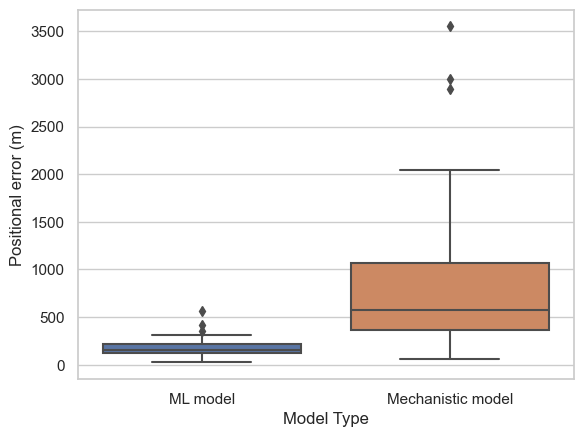

In [29]:
# Set the style with grid lines
sns.set(style="whitegrid")

# Create the boxplot with horizontal grid lines
sns.boxplot(data=figure_data, x="Model Type", y="Error")

# Label the y-axis
plt.ylabel("Positional error (m)")

# Show the plot
plt.show()


In [24]:
figure_data


,Model Type,Error
0,ML model error,165.847953
1,ML model error,24.492344
2,ML model error,51.327079
3,ML model error,149.141427
4,ML model error,137.241075
5,ML model error,351.724099
6,ML model error,214.691160
7,ML model error,117.709160
8,ML model error,129.651711
9,ML model error,155.378397


In [4]:
mech_ml_estimates

,DateTime,TagID,easting,northing,easting_pred,northing_pred,Tower_count,Data_type,Signal_count,xOffset,...,northing_error,error_m,mean_distance_from_tower,training_data_type,inteval_seconds,easting_estimated_mech,northing_estimated_mech,easting_mech_error,northing_mech_error,error_mech_m
0,2021-02-02 07:51:00,60,423203.210195,7.575845e+06,423128.694243,7.575921e+06,2,Tracked bird,4,60.785672,...,75.642357,106.180946,78.187231,Combined,13,NaN,NaN,NaN,NaN,NaN
1,2021-02-02 07:54:00,60,423203.210195,7.575845e+06,423065.351077,7.575734e+06,2,Tracked bird,15,60.785672,...,-111.071042,177.036472,78.187231,Combined,13,NaN,NaN,NaN,NaN,NaN
2,2021-02-04 18:36:00,52,427298.584493,7.565190e+06,427436.823929,7.565282e+06,4,Tracked bird,31,-168.960554,...,91.626425,165.847953,292.368227,Combined,13,429709.251945,7.563588e+06,2410.667452,-1601.962361,2894.40857
3,2021-02-04 18:39:00,52,427298.584493,7.565190e+06,427376.232446,7.565197e+06,4,Tracked bird,10,-168.960554,...,6.945487,77.957966,292.368227,Combined,13,NaN,NaN,NaN,NaN,NaN
4,2021-02-10 16:09:00,50,423203.210195,7.575845e+06,423398.945954,7.575982e+06,4,Simulated bird,20,48.473880,...,136.620209,238.699747,70.702270,Combined,13,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,2023-05-23 10:42:00,192,421233.248221,7.573822e+06,421073.286576,7.574000e+06,1,Tracked bird,58,103.510404,...,177.991583,239.308862,195.221734,Simulated bird,3,NaN,NaN,NaN,NaN,NaN
734,2023-05-23 10:45:00,192,421233.248221,7.573822e+06,421073.286576,7.574001e+06,1,Tracked bird,56,103.510404,...,179.315599,240.295260,195.221734,Simulated bird,3,NaN,NaN,NaN,NaN,NaN
735,2023-05-23 10:48:00,192,421233.248221,7.573822e+06,421073.286576,7.573993e+06,1,Tracked bird,54,103.510404,...,171.636033,234.620237,195.221734,Simulated bird,3,NaN,NaN,NaN,NaN,NaN
736,2023-05-23 10:51:00,192,421233.248221,7.573822e+06,421073.286576,7.573991e+06,1,Tracked bird,44,103.510404,...,169.006520,232.703527,195.221734,Simulated bird,3,NaN,NaN,NaN,NaN,NaN
